In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Non-convex GD using fractional Caputo gradient

$$
\partial^s_a f = \frac{1}{\Gamma(1-s)}\int_{a=-\varepsilon}^x\frac{\partial f(\tau)}{(x-\tau)^s}
$$

$$
x \leftarrow x-t\partial^sf(x)
$$

In [3]:
import scipy as sc
from scipy import integrate

def caputo(x, s, grad_func, a=0., lam=0.2):
    # if not np.prod(grad_func(x)):
    #     return 0
    def integrand(tau):
        return (1/sc.special.gamma(1-s))*(grad_func(tau))/(x-tau)**(s)
    return integrate.quad(np.vectorize(integrand), a, x)[0]

def caputo(x, s, grad_func, a=0., lam=0.2):
    # if not np.prod(grad_func(x)):
    #     return 0
    def integrand(tau):
        return (1/sc.special.gamma(1-s))*(grad_func(tau))*np.exp(-s*(x-tau)/(1-s))
    return integrate.quad(np.vectorize(integrand), a, x)[0]




caputo = np.vectorize(caputo)

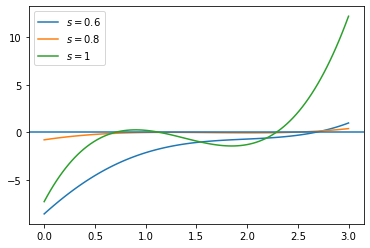

In [4]:
f = lambda x:  x**4-5.5*x**3+10*x**2-7.3*x
df = lambda x: 4*x**3-5.5*3*x**2+20*x-7.3
x = np.linspace(0, 3, 100)

plt.figure()
for gamma in [0.6, 0.8]:
    plt.plot(x, caputo(x, gamma, df, a=-2), label=fr"$s={gamma}$")
plt.axhline(0)
plt.plot(x,df(x), label=r'$s=1$')
plt.legend();

In [5]:
def df_caputo(x, s, a):
    return np.array([caputo(x[0], s, df, a), 
                     caputo(x[1], s, df, a)])

In [34]:
t = .02
ff = lambda x:  x[0]**4-5.5*x[0]**3+10*x[0]**2-7.3*x[0]+ x[1]**4-5.5*x[1]**3+10*x[1]**2-7.3*x[1]

x = [np.array([0, 0.2])]
loss = []
for i in range(0, 450):
    grad = df_caputo(x[-1], 0.63, -0.1)
    x.append( x[-1]-t*grad)
    loss.append(np.linalg.norm(grad))
print(np.round(x[-1], 5))

[2.32294 2.40254]


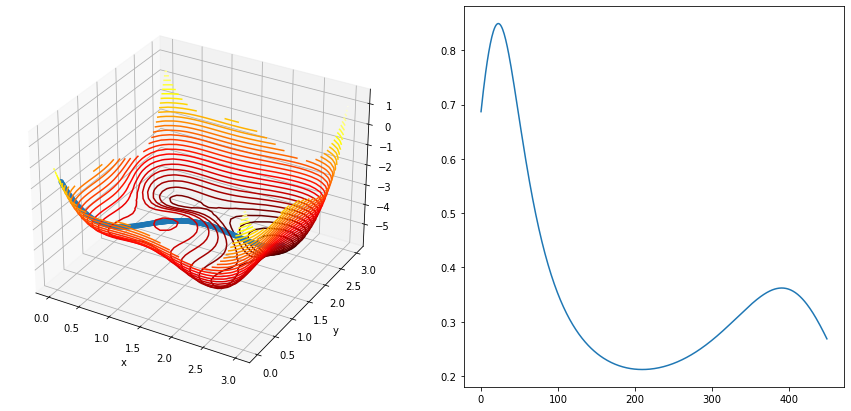

In [35]:
x = np.array(x)
X, Y = np.meshgrid(np.linspace(0, 3, 30), np.linspace(0, 3, 30))
Z = ff([X, Y])
fig= plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.contour3D(X, Y, Z, 40, cmap='hot')
ax1.scatter3D(x[:, 0 ], x[:, 1], ff(x.T));
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(loss)

### Idea

Use the fact that the fractional gradient is computed using global data to create an 2-parameter family of fractional critical points. No matter the dimension of the objective, the search space is always two dimensional. The downside is that computing the fractional gradients is expensive - though there are fairly fast methods I have not implemented. 

If this compares favorably to annealing, write paper.

### Adaptive fractional GD

Choose a function class that interpolates $s$ between $0.5$ and $1$. There exists a correct choice of function class such that the global minimum is obtained.